In [117]:
#Initializing the data into dataframes and importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
#% matplotlib inline

cn_df = pd.read_csv('U.S. Census Data.csv')
gd_df = pd.read_excel('gun_data.xlsx',engine='openpyxl')

<AxesSubplot:xlabel='month'>

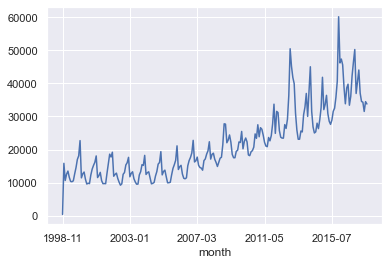

In [118]:
#Looking at gun totals by month
gd_df.groupby('month',as_index='False').mean()['totals'].plot()

That's interesting, there seems to be a consistent trend of gun buying within each year.

In [119]:
#Adding columns for split year and split month and renaming month to be year-month 
new_col = list(gd_df['month'])
year = []
month = []
for i in new_col:
    year.append(i[0:4])
    month.append(i[5:])
gd_df['year-month'] = gd_df['month']
gd_df['month'] = month
gd_df['year'] = year

In [120]:
#Reordering columns
cols = gd_df.columns.to_list()
cols = cols[-2:] + cols[:-2]
gd_df = gd_df[cols]

<AxesSubplot:xlabel='month'>

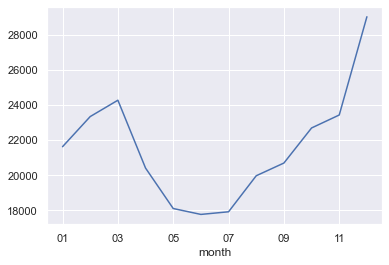

In [121]:
gd_df.groupby('month').mean()['totals'].plot()

We know from the graph above that in general guns are purchased near the winter time and fewer are bought in the summer.

<AxesSubplot:xlabel='year'>

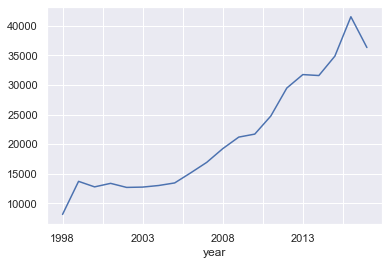

In [122]:
gd_df.groupby('year').mean()['totals'].plot()

And we know from the above graph that gun sales have been steadily climbing for the past several years, with a recent decrease starting when?

<BarContainer object of 55 artists>

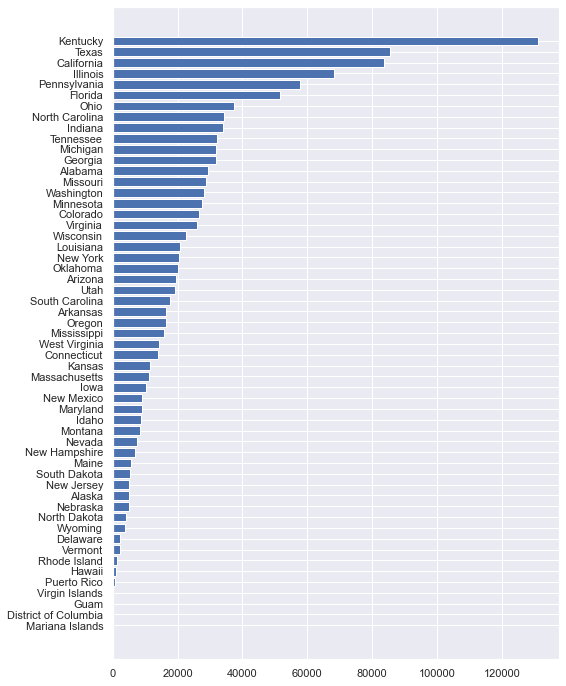

In [159]:
totals = gd_df.groupby('state').mean()['totals'].sort_values(ascending=True)
plt.figure(figsize=(8,12))
plt.barh(totals.index,totals)

We can see that residents of Kentucky, Texas, California, Illinois, and Pennsylvania are among the top gun buyers throughout this time period.